In [2]:
import seaborn                   # 데이타
import matplotlib.pyplot as plt  # 그래프 라이브러리

tips = seaborn.load_dataset('tips') # 팁을 지불한 손님의 정보 데이타
tips.head()   # 지불금액 / 팁 / 성별 / 흡연 / 요일 / 시간대 / 인원수

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# 한글처리
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus']=False  # 추가설정 : 폰트를 변경하면 -표시가 ㅁ으로 변경되기에 '-'를 변경하지 않도록 지정
rc('font', family='Malgun Gothic')


## 1. 일변량 그래프 - 하나의 변수만 사용한 그래프

- 히스토그램(수치변수) 나이, 몸무게

- 막대그래프(범주변수) 성별, 학력

  [예] 전체지불금액(total_bill)에 대한 그래프

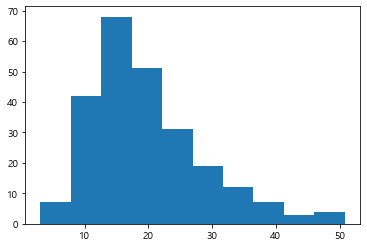

In [4]:
# 여기에 코드

plt.hist(tips['total_bill']); # 수치 그래프, 히스토그램

<AxesSubplot:>

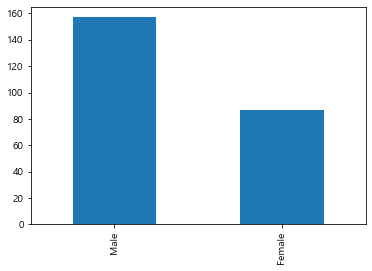

In [9]:
sex = tips['sex'].value_counts()
sex

# plt.bar(["Male","Female"],sex) # 범주 그래프, 막대그래프
sex.plot(kind="bar")

##  2. 이변량 그래프 - 변수 2개를 이용한 그래프 ( 산점도 그래프 )
    [예] 지불금액에 따른 팁 금액을 나타내는 그래프

Text(0, 0.5, '팁')

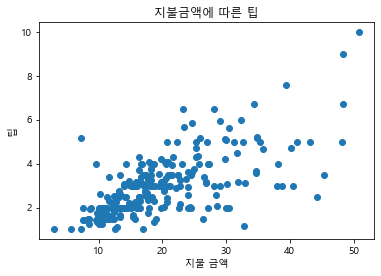

In [11]:
# 여기에 코드

plt.scatter(tips["total_bill"], tips["tip"])
plt.title('지불금액에 따른 팁')
plt.xlabel('지불 금액')
plt.ylabel('팁')

## 3. 이산형 변수와 연속형 변수 - 박스플롯
    이산형 - 성별이나 국적처럼 명확하게 구분되는 값
    연속형 - 수치로 이루어진 값

    [예] 성별에 따른 팁을 나타내는 그래프

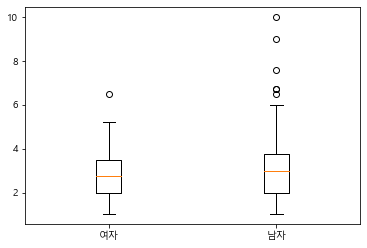

In [16]:
# 여기에 코드

female = tips[tips["sex"]=="Female"]["tip"]
female
male = tips[tips["sex"]=="Male"]["tip"]
male

plt.boxplot([female,male], labels=["여자","남자"]);

##  4. 다변량 그래프 - 3개 이상의 변수로 그래프 - 산점도 그래프

      [예] 식사지불과 팁의 정도를 성별에 따라 그래프를 그린다면?
      
      * 성별의 문자열값을 0과 1로 변경하여 다른 색상으로 그리고자 한다

Text(0, 0.5, '팁')

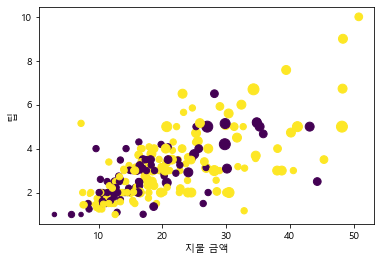

In [30]:
# (1) 성별을 0과 1로 변환하는 함수 선언
def gender(sex):
    if sex=="Female":
        return 0
    return 1


# (2) 변경한 성별값의 변수(컬럼 sex_col) 추가
tips["sex_col"] = tips["sex"].apply(gender)
tips


# (3) 그래프 : x와 y 축, c=점의 색상, alpha=점의 투명도, s=점의 크기
#    테이블당의 인원수를 점의 크기로 표현한다면 s=tips['size']*10 추가

plt.scatter(x=tips["total_bill"], y=tips["tip"],c=tips["sex_col"], s=tips["size"]*20)
plt.xlabel("지불 금액")
plt.ylabel("팁")

[ 참고 ]  plt.scatter와 plt.plot 정리
